## 11.1日期和时间数据的类型及工具

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [2]:
%matplotlib notebook

In [3]:
now = datetime.now()

In [4]:
now

datetime.datetime(2019, 7, 23, 20, 20, 46, 983694)

In [5]:
now.year, now.month, now.day

(2019, 7, 23)

In [6]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [7]:
delta

datetime.timedelta(days=926, seconds=56700)

In [8]:
delta.days

926

In [9]:
delta.seconds

56700

In [10]:
from datetime import timedelta

In [11]:
start = datetime(2011, 1, 7)

In [12]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [13]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### 11.1.1字符串与datetime互相转换

In [14]:
stamp = datetime(2011, 1, 3)

In [15]:
str(stamp)

'2011-01-03 00:00:00'

In [16]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [17]:
stamp

datetime.datetime(2011, 1, 3, 0, 0)

In [18]:
value = '2011-01-03'

In [19]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [20]:
datestrs = ['7/6/2011', '8/6/2011']

In [21]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [22]:
from dateutil.parser import parse

In [23]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [24]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [25]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [26]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [27]:
idx = pd.to_datetime(datestrs + [None])

In [28]:
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [29]:
idx[2]

NaT

In [30]:
pd.isnull(idx)

array([False, False,  True])

## 11.2 时间序列基础

In [31]:
from datetime import datetime

In [32]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [33]:
ts = pd.Series(np.random.randn(6), index=dates)

In [34]:
ts

2011-01-02   -0.184093
2011-01-05    0.571335
2011-01-07    0.087762
2011-01-08   -0.236788
2011-01-10    0.758689
2011-01-12   -0.141175
dtype: float64

In [35]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [36]:
ts + ts[::2]

2011-01-02   -0.368186
2011-01-05         NaN
2011-01-07    0.175524
2011-01-08         NaN
2011-01-10    1.517378
2011-01-12         NaN
dtype: float64

In [37]:
ts.index.dtype

dtype('<M8[ns]')

In [38]:
stamp = ts.index[0]

In [39]:
stamp

Timestamp('2011-01-02 00:00:00')

### 11.2.1索引、选择、子集

In [40]:
stamp = ts.index[2]

In [41]:
ts[stamp]

0.08776209606636337

In [42]:
ts['1/10/2011']
ts['20110110']

0.7586890769247158

In [43]:
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [44]:
longer_ts

2000-01-01    0.002213
2000-01-02    0.155308
2000-01-03    0.253308
2000-01-04    2.051244
2000-01-05    0.196619
2000-01-06    0.988297
2000-01-07   -1.304369
2000-01-08    1.347372
2000-01-09   -1.769134
2000-01-10    0.384831
2000-01-11    0.348506
2000-01-12   -0.626278
2000-01-13    0.258038
2000-01-14    0.589641
2000-01-15    0.072638
2000-01-16   -0.134504
2000-01-17   -0.358058
2000-01-18   -0.938328
2000-01-19   -3.249301
2000-01-20    0.605587
2000-01-21    0.898646
2000-01-22   -0.801823
2000-01-23   -0.209203
2000-01-24    0.518255
2000-01-25    0.051354
2000-01-26   -0.089392
2000-01-27    1.286767
2000-01-28   -0.631213
2000-01-29    0.411982
2000-01-30   -0.627132
                ...   
2002-08-28    0.182946
2002-08-29   -0.556088
2002-08-30    0.486263
2002-08-31    1.348782
2002-09-01   -2.460196
2002-09-02    0.417204
2002-09-03   -0.847096
2002-09-04   -2.329022
2002-09-05   -1.106568
2002-09-06   -0.231695
2002-09-07    0.396034
2002-09-08   -0.295127
2002-09-09 

In [45]:
longer_ts['2001']

2001-01-01   -0.468151
2001-01-02   -0.764633
2001-01-03    0.022035
2001-01-04    0.425505
2001-01-05    0.192281
2001-01-06    2.573591
2001-01-07   -2.453468
2001-01-08    0.067240
2001-01-09   -0.747397
2001-01-10   -0.057301
2001-01-11   -0.100286
2001-01-12    1.072900
2001-01-13    0.063271
2001-01-14    0.088449
2001-01-15   -0.877665
2001-01-16   -1.824085
2001-01-17   -0.299236
2001-01-18    0.018336
2001-01-19   -0.214110
2001-01-20    1.499831
2001-01-21   -1.189799
2001-01-22   -1.185378
2001-01-23   -0.561291
2001-01-24    1.267773
2001-01-25    0.254765
2001-01-26   -0.123108
2001-01-27   -0.863489
2001-01-28   -2.740384
2001-01-29    0.598771
2001-01-30    0.222170
                ...   
2001-12-02   -0.478968
2001-12-03    0.453126
2001-12-04   -1.049520
2001-12-05   -0.099475
2001-12-06    1.636567
2001-12-07    0.845914
2001-12-08   -0.495071
2001-12-09    0.305569
2001-12-10    0.520114
2001-12-11    0.237655
2001-12-12    1.617233
2001-12-13   -0.341932
2001-12-14 

In [46]:
longer_ts['2001-05']

2001-05-01   -1.605264
2001-05-02   -1.617958
2001-05-03   -1.301459
2001-05-04   -2.466297
2001-05-05    0.520263
2001-05-06    0.505756
2001-05-07   -0.466486
2001-05-08   -3.126595
2001-05-09    2.939640
2001-05-10    1.179685
2001-05-11    0.563208
2001-05-12   -1.716035
2001-05-13    0.449236
2001-05-14    1.008857
2001-05-15    0.801552
2001-05-16    0.192778
2001-05-17    0.405417
2001-05-18   -0.698976
2001-05-19    0.236224
2001-05-20    1.107041
2001-05-21    1.182872
2001-05-22    0.619978
2001-05-23   -1.269862
2001-05-24    0.341670
2001-05-25    0.562656
2001-05-26    0.348883
2001-05-27    0.516870
2001-05-28   -0.238171
2001-05-29    1.562309
2001-05-30   -1.037895
2001-05-31   -0.723630
Freq: D, dtype: float64

In [47]:
ts[datetime(2011, 1, 7):]

2011-01-07    0.087762
2011-01-08   -0.236788
2011-01-10    0.758689
2011-01-12   -0.141175
dtype: float64

In [48]:
ts

2011-01-02   -0.184093
2011-01-05    0.571335
2011-01-07    0.087762
2011-01-08   -0.236788
2011-01-10    0.758689
2011-01-12   -0.141175
dtype: float64

In [49]:
ts['1/6/2011': '1/11/2011']

2011-01-07    0.087762
2011-01-08   -0.236788
2011-01-10    0.758689
dtype: float64

In [50]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.184093
2011-01-05    0.571335
2011-01-07    0.087762
2011-01-08   -0.236788
dtype: float64

In [51]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

In [52]:
long_df = pd.DataFrame(np.random.randn(100, 4),
                      index=dates,
                      columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])

In [53]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-1.977064,1.464792,-0.003903,-1.885615
2001-05-09,-0.166124,-1.242909,0.251169,0.085829
2001-05-16,1.289515,-0.778443,0.573923,-0.288524
2001-05-23,0.605687,-1.596408,1.122903,2.353066
2001-05-30,0.612852,-0.577233,0.206594,-0.230280


In [54]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])

In [55]:
dup_ts = pd.Series(np.arange(5), index=dates)

In [56]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [57]:
dup_ts.index.is_unique

False

In [58]:
dup_ts['1/3/2000']

4

In [59]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [60]:
grouped = dup_ts.groupby(level=0)

In [61]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [62]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 11.3日期范围、频率和位移

In [63]:
ts

2011-01-02   -0.184093
2011-01-05    0.571335
2011-01-07    0.087762
2011-01-08   -0.236788
2011-01-10    0.758689
2011-01-12   -0.141175
dtype: float64

In [64]:
resampler = ts.resample('D')

### 11.3.1生成日期范围

In [65]:
index = pd.date_range('2012-04-01', '2012-06-01')

In [66]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [67]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [68]:
pd.date_range(end='2012-06-01',periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [69]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [70]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [71]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### 11.3.2频率和日期偏置

In [72]:
from pandas.tseries.offsets import Hour, Minute

In [73]:
hour = Hour()

In [74]:
hour

<Hour>

In [75]:
four_hours = Hour(4)

In [76]:
four_hours

<4 * Hours>

In [77]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [78]:
Hour(2) + Minute(30)

<150 * Minutes>

In [79]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [80]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

In [81]:
rng

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

In [82]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### 11.3.3 位移（前向和后向）日期

In [83]:
ts = pd.Series(np.random.randn(4),
              index=pd.date_range('1/1/2000', periods=4, freq='M'))

In [84]:
ts

2000-01-31    0.408175
2000-02-29   -0.338089
2000-03-31    1.617325
2000-04-30   -0.276633
Freq: M, dtype: float64

In [85]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.408175
2000-04-30   -0.338089
Freq: M, dtype: float64

In [86]:
ts.shift(-2)

2000-01-31    1.617325
2000-02-29   -0.276633
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [87]:
ts / ts.shift(1)  - 1

2000-01-31         NaN
2000-02-29   -1.828293
2000-03-31   -5.783734
2000-04-30   -1.171044
Freq: M, dtype: float64

In [88]:
ts.shift(2, freq='M')

2000-03-31    0.408175
2000-04-30   -0.338089
2000-05-31    1.617325
2000-06-30   -0.276633
Freq: M, dtype: float64

In [89]:
ts.shift(3, freq='D')

2000-02-03    0.408175
2000-03-03   -0.338089
2000-04-03    1.617325
2000-05-03   -0.276633
dtype: float64

In [90]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    0.408175
2000-02-29 01:30:00   -0.338089
2000-03-31 01:30:00    1.617325
2000-04-30 01:30:00   -0.276633
Freq: M, dtype: float64

#### 11.3.3.1使用偏置进行位移日期

In [91]:
from pandas.tseries.offsets import Day, MonthEnd

In [92]:
datetime.now()

datetime.datetime(2019, 7, 23, 20, 20, 47, 999752)

In [93]:
now = datetime(2011, 11, 17)

In [94]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [95]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [96]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [97]:
offset = MonthEnd()

In [98]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [99]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [100]:
ts = pd.Series(np.random.randn(20),
              index=pd.date_range('1/15/2000', periods=20, freq='4d'))

In [101]:
ts

2000-01-15    0.250104
2000-01-19   -1.003157
2000-01-23   -0.441564
2000-01-27    0.602531
2000-01-31    1.351685
2000-02-04   -1.446385
2000-02-08   -0.279408
2000-02-12   -1.117181
2000-02-16   -0.044515
2000-02-20   -0.559154
2000-02-24    1.789768
2000-02-28    1.983202
2000-03-03   -1.222443
2000-03-07    0.629252
2000-03-11   -1.009905
2000-03-15   -0.108897
2000-03-19   -0.318672
2000-03-23   -1.302511
2000-03-27   -0.426844
2000-03-31   -1.463362
Freq: 4D, dtype: float64

In [102]:
ts.groupby(offset.rollforward).mean()

2000-01-31    0.151920
2000-02-29    0.046618
2000-03-31   -0.652923
dtype: float64

In [103]:
ts.resample('M').mean()

2000-01-31    0.151920
2000-02-29    0.046618
2000-03-31   -0.652923
Freq: M, dtype: float64

## 11.4时区处理

In [104]:
conda install pytz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [105]:
import pytz

In [106]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [107]:
tz = pytz.timezone('America/New_York')

In [108]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### 11.4.1时区的本地化和转换

In [109]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

In [110]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [111]:
ts

2012-03-09 09:30:00   -0.179944
2012-03-10 09:30:00    0.623064
2012-03-11 09:30:00    1.146654
2012-03-12 09:30:00    0.438465
2012-03-13 09:30:00    2.147781
2012-03-14 09:30:00   -0.787694
Freq: D, dtype: float64

In [112]:
print(ts.index.tz)

None


In [113]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D', tz='UTC')

In [114]:
rng

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [115]:
ts

2012-03-09 09:30:00   -0.179944
2012-03-10 09:30:00    0.623064
2012-03-11 09:30:00    1.146654
2012-03-12 09:30:00    0.438465
2012-03-13 09:30:00    2.147781
2012-03-14 09:30:00   -0.787694
Freq: D, dtype: float64

In [116]:
ts_utc = ts.tz_localize('UTC')

In [117]:
ts_utc

2012-03-09 09:30:00+00:00   -0.179944
2012-03-10 09:30:00+00:00    0.623064
2012-03-11 09:30:00+00:00    1.146654
2012-03-12 09:30:00+00:00    0.438465
2012-03-13 09:30:00+00:00    2.147781
2012-03-14 09:30:00+00:00   -0.787694
Freq: D, dtype: float64

In [118]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.179944
2012-03-10 04:30:00-05:00    0.623064
2012-03-11 05:30:00-04:00    1.146654
2012-03-12 05:30:00-04:00    0.438465
2012-03-13 05:30:00-04:00    2.147781
2012-03-14 05:30:00-04:00   -0.787694
Freq: D, dtype: float64

In [119]:
ts_eastern = ts.tz_localize('America/New_York')

In [120]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.179944
2012-03-10 14:30:00+00:00    0.623064
2012-03-11 13:30:00+00:00    1.146654
2012-03-12 13:30:00+00:00    0.438465
2012-03-13 13:30:00+00:00    2.147781
2012-03-14 13:30:00+00:00   -0.787694
Freq: D, dtype: float64

In [121]:
ts_eastern

2012-03-09 09:30:00-05:00   -0.179944
2012-03-10 09:30:00-05:00    0.623064
2012-03-11 09:30:00-04:00    1.146654
2012-03-12 09:30:00-04:00    0.438465
2012-03-13 09:30:00-04:00    2.147781
2012-03-14 09:30:00-04:00   -0.787694
Freq: D, dtype: float64

In [122]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### 11.7移动窗口函数

In [123]:
close_px_all = pd.read_csv('G:/python/pydata-book-2nd-edition/examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)

In [124]:
close_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
2003-01-09,7.34,21.93,29.44,927.57
2003-01-10,7.36,21.97,29.03,927.57
2003-01-13,7.32,22.16,28.91,926.26
2003-01-14,7.30,22.39,29.17,931.66
2003-01-15,7.22,22.11,28.77,918.22


In [125]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [126]:
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


In [127]:
close_px = close_px.resample('B').ffill()

In [128]:
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


<IPython.core.display.Javascript object>


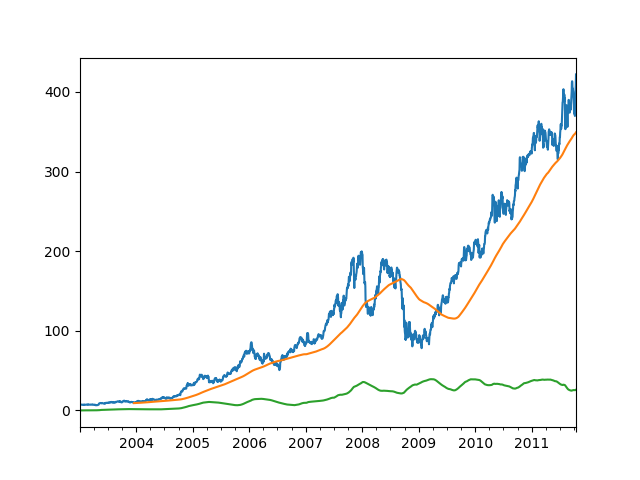

In [129]:
close_px.AAPL.plot()

In [130]:
close_px.AAPL.rolling(250).mean().plot()

In [131]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

In [132]:
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

In [133]:
appl_std250.plot()

In [134]:
expanding_mean = appl_std250.expanding().mean()

<IPython.core.display.Javascript object>


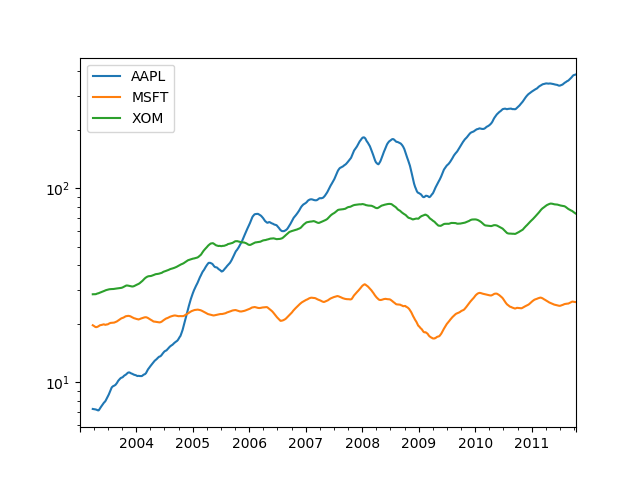

In [157]:
close_px.rolling(60).mean().plot(logy=True)

In [136]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
2003-01-10,7.387143,21.558571,29.238571
2003-01-13,7.378750,21.633750,29.197500
2003-01-14,7.370000,21.717778,29.194444
2003-01-15,7.355000,21.757000,29.152000


### 11.7.1指数加权函数

In [137]:
appl_px = close_px.AAPL['2006': '2007']

In [138]:
ma60 = appl_px.rolling(30, min_periods=20).mean()

In [139]:
ewma60 = appl_px.ewm(span=30).mean()

In [140]:
ma60.plot(style='k--', label='Simple MA')

In [141]:
ewma60.plot(style='k--', label='EW MA')

In [142]:
plot.legend()

### 11.7.2二元移动窗口函数

In [143]:
spx_px = close_px_all['SPX']

In [144]:
spx_rets = spx_px.pct_change()

In [145]:
returns = close_px.pct_change()

In [146]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)

In [147]:
corr.plot()

In [154]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)

<IPython.core.display.Javascript object>


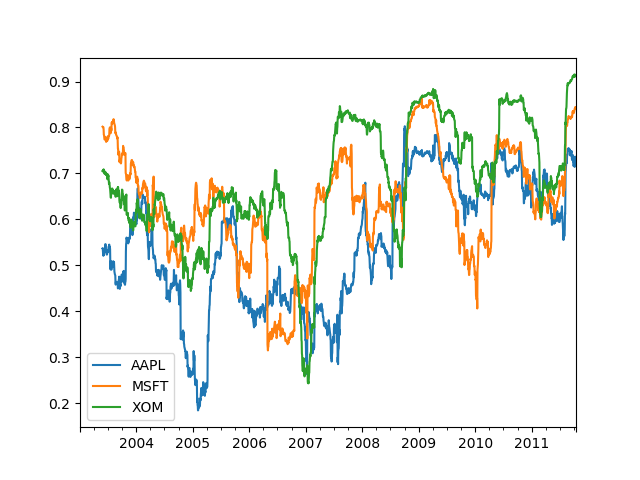

In [155]:
corr.plot()

### 11.7.3用户自定义的移动窗口函数

In [150]:
from scipy.stats import percentileofscore

In [151]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)

In [152]:
result = returns.AAPL.rolling(250).apply(score_at_2percent)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


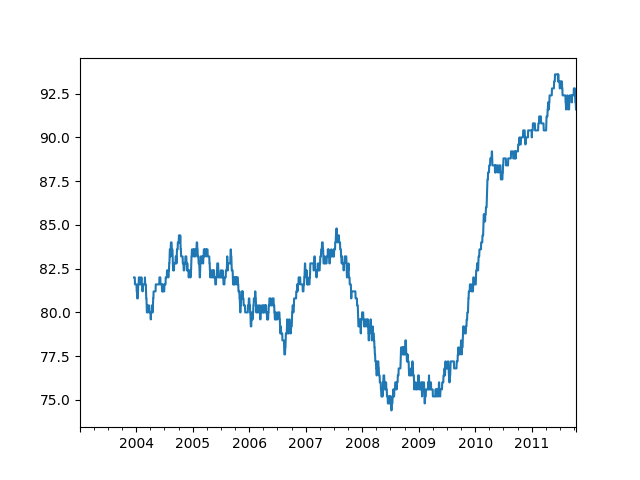

In [158]:
result.plot()